# <p style="background-color:#00BFFF; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">  MODELS For Sale &  Rent </p>

## <p style="background-color:#F5A623; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">  IMPORTS </p>

In [436]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)

## <p style="background-color:#696969; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Sale </p>

### <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Data PreProcessing</p>

In [437]:
df = pd.read_csv('ML2.csv')

#### Creating Sales

In [438]:
# Creating Sale 
Sale = df[df['to_rent'] == False]

In [439]:
Sale.head()

,Unnamed: 0,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,area_of_the_terrace,garden,area_of_the_garden,swimming_pool,state_of_the_building,zipcode,type,region,region_be,price_perm2
7888,7890,False,175000.0,1.0,50.0,True,False,False,True,4.0,False,0.0,False,bon,3530,Appartementdeservice,Limburg,Region Flanders,3500.000000
7889,7891,False,386865.0,3.0,179.0,True,False,False,False,0.0,True,406.0,False,bon,3520,Maison,Limburg,Region Flanders,2161.256983
7890,7892,False,330435.0,3.0,144.0,True,False,False,False,0.0,True,50.0,False,àrafraîchir,3840,Maison,Limburg,Region Flanders,2294.687500
7891,7893,False,288160.0,3.0,133.0,True,False,False,False,0.0,True,50.0,False,bon,3840,Maison,Limburg,Region Flanders,2166.616541
7892,7894,False,288160.0,3.0,133.0,True,False,False,False,0.0,True,50.0,False,àrénover,3840,Maison,Limburg,Region Flanders,2166.616541


In [440]:
Sale.reset_index()

,index,Unnamed: 0,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,area_of_the_terrace,garden,area_of_the_garden,swimming_pool,state_of_the_building,zipcode,type,region,region_be,price_perm2
0,7888,7890,False,175000.0,1.0,50.0,True,False,False,True,4.0,False,0.0,False,bon,3530,Appartementdeservice,Limburg,Region Flanders,3500.000000
1,7889,7891,False,386865.0,3.0,179.0,True,False,False,False,0.0,True,406.0,False,bon,3520,Maison,Limburg,Region Flanders,2161.256983
2,7890,7892,False,330435.0,3.0,144.0,True,False,False,False,0.0,True,50.0,False,àrafraîchir,3840,Maison,Limburg,Region Flanders,2294.687500
3,7891,7893,False,288160.0,3.0,133.0,True,False,False,False,0.0,True,50.0,False,bon,3840,Maison,Limburg,Region Flanders,2166.616541
4,7892,7894,False,288160.0,3.0,133.0,True,False,False,False,0.0,True,50.0,False,àrénover,3840,Maison,Limburg,Region Flanders,2166.616541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19238,27126,27940,False,245000.0,5.0,180.0,False,False,False,True,29.0,True,75.0,False,àrafraîchir,4000,Maison,Liège,Region Walloonie,1361.111111
19239,27127,27941,False,479000.0,5.0,150.0,True,False,True,True,20.0,False,0.0,False,excellentétat,1120,Maison,Brussels,Brussels,3193.333333
19240,27128,27942,False,360000.0,4.0,180.0,True,True,True,True,16.0,True,200.0,False,bon,2300,Villa,Antwerp,Region Flanders,2000.000000
19241,27129,27943,False,325000.0,2.0,109.0,True,False,False,True,37.0,False,0.0,True,bon,9500,Bungalow,East Flanders,Region Flanders,2981.651376


In [441]:
Sale.drop(['Unnamed: 0'], axis=1, inplace=True)

In [442]:
Sale.shape

(19243, 18)

In [443]:
Sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 7888 to 27130
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   to_rent                 19243 non-null  bool   
 1   price                   19243 non-null  float64
 2   number_of_rooms         19243 non-null  float64
 3   living_area             19243 non-null  float64
 4   fully_equipped_kitchen  19243 non-null  bool   
 5   furnished               19243 non-null  bool   
 6   open_fire               19243 non-null  bool   
 7   terrace                 19243 non-null  bool   
 8   area_of_the_terrace     19243 non-null  float64
 9   garden                  19243 non-null  bool   
 10  area_of_the_garden      19243 non-null  float64
 11  swimming_pool           19243 non-null  bool   
 12  state_of_the_building   19243 non-null  object 
 13  zipcode                 19243 non-null  int64  
 14  type                    19243 non-n

#### Dropping Columns

In [444]:
Sale.drop(['open_fire', 'area_of_the_terrace','area_of_the_garden','zipcode','region_be','to_rent'],axis=1, inplace=True)

In [445]:
Sale

,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,terrace,garden,swimming_pool,state_of_the_building,type,region,price_perm2
7888,175000.0,1.0,50.0,True,False,True,False,False,bon,Appartementdeservice,Limburg,3500.000000
7889,386865.0,3.0,179.0,True,False,False,True,False,bon,Maison,Limburg,2161.256983
7890,330435.0,3.0,144.0,True,False,False,True,False,àrafraîchir,Maison,Limburg,2294.687500
7891,288160.0,3.0,133.0,True,False,False,True,False,bon,Maison,Limburg,2166.616541
7892,288160.0,3.0,133.0,True,False,False,True,False,àrénover,Maison,Limburg,2166.616541
...,...,...,...,...,...,...,...,...,...,...,...,...
27126,245000.0,5.0,180.0,False,False,True,True,False,àrafraîchir,Maison,Liège,1361.111111
27127,479000.0,5.0,150.0,True,False,True,False,False,excellentétat,Maison,Brussels,3193.333333
27128,360000.0,4.0,180.0,True,True,True,True,False,bon,Villa,Antwerp,2000.000000
27129,325000.0,2.0,109.0,True,False,True,False,True,bon,Bungalow,East Flanders,2981.651376


#### IsNull ? 

In [446]:
Sale.isnull().sum()

price                     0
number_of_rooms           0
living_area               0
fully_equipped_kitchen    0
furnished                 0
terrace                   0
garden                    0
swimming_pool             0
state_of_the_building     0
type                      0
region                    0
price_perm2               0
dtype: int64

#### Outliers Of The Sale

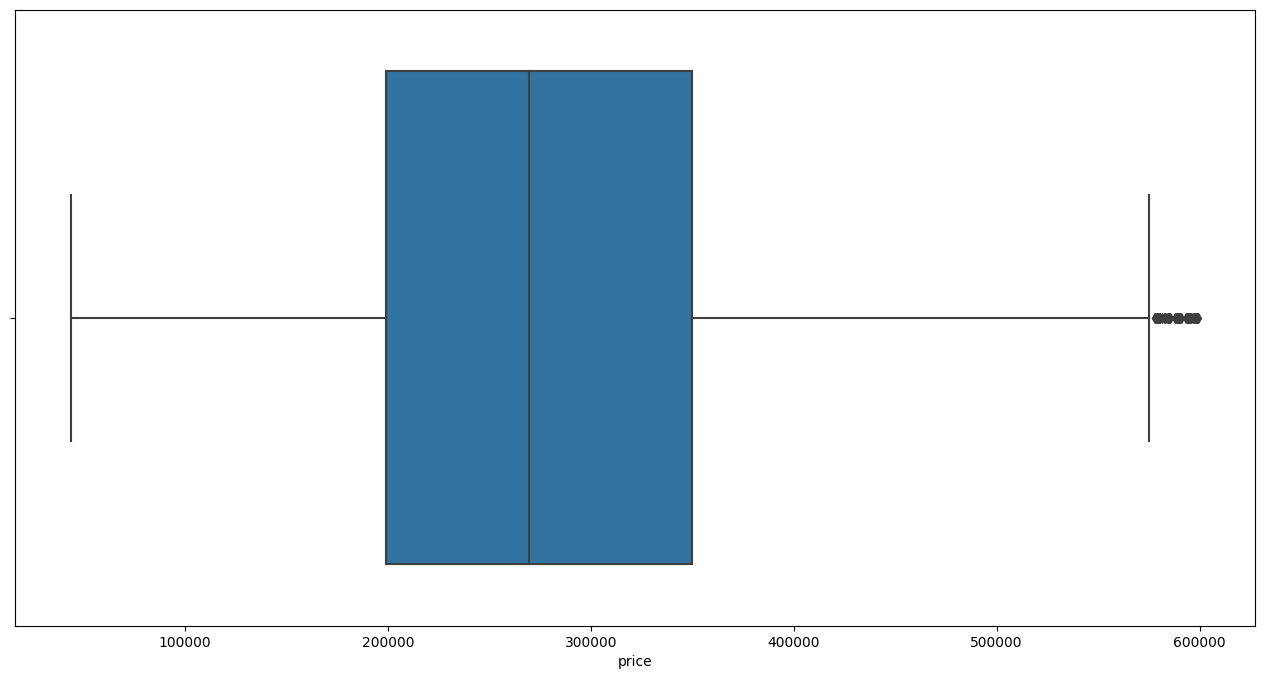

In [447]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="price", data=Sale) 
plt.show()

In [448]:
Outlier_upper_Sale = Sale[Sale.price >= 570000.000000].index
Sale.drop(Outlier_upper_Sale, inplace = True)

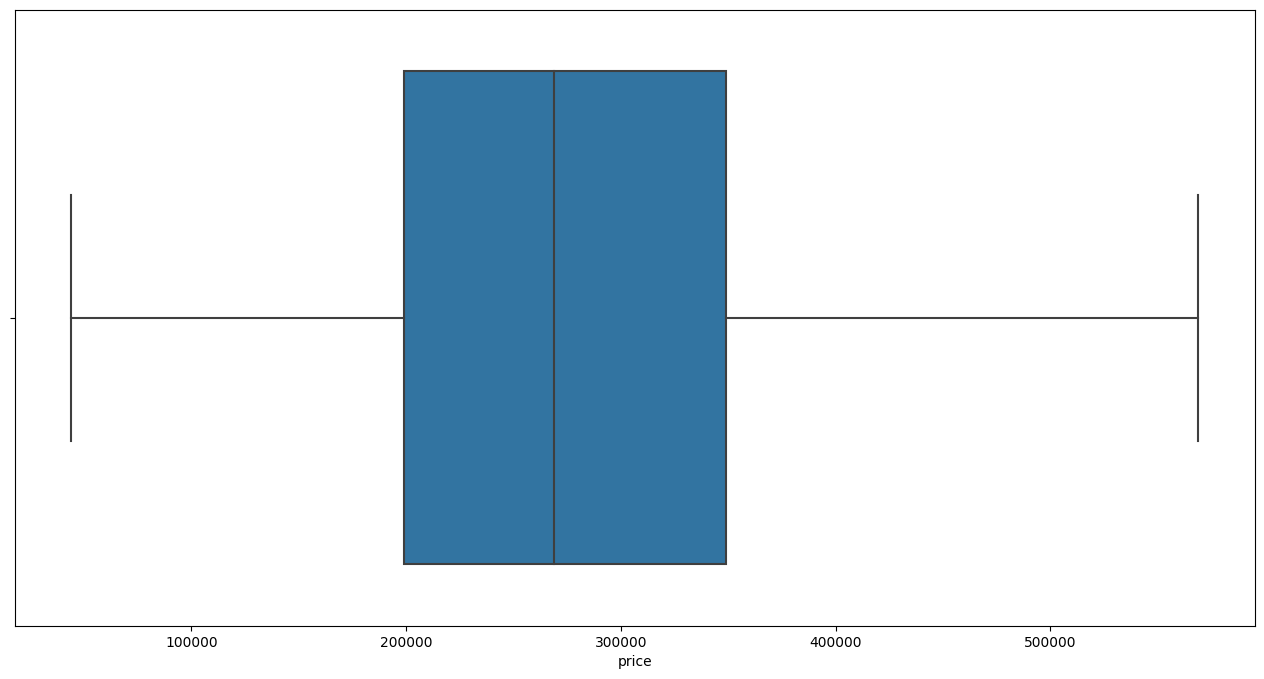

In [449]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="price", data=Sale) 
plt.show()

<AxesSubplot: >

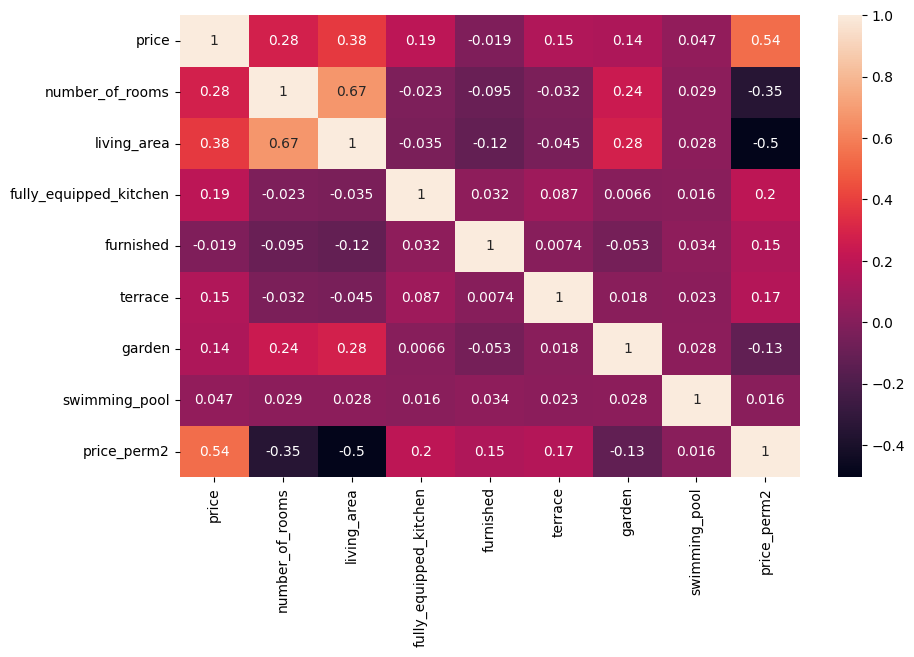

In [450]:
sns.heatmap(Sale.corr(), annot= True)

#### Dummies

In [451]:
Sale

,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,terrace,garden,swimming_pool,state_of_the_building,type,region,price_perm2
7888,175000.0,1.0,50.0,True,False,True,False,False,bon,Appartementdeservice,Limburg,3500.000000
7889,386865.0,3.0,179.0,True,False,False,True,False,bon,Maison,Limburg,2161.256983
7890,330435.0,3.0,144.0,True,False,False,True,False,àrafraîchir,Maison,Limburg,2294.687500
7891,288160.0,3.0,133.0,True,False,False,True,False,bon,Maison,Limburg,2166.616541
7892,288160.0,3.0,133.0,True,False,False,True,False,àrénover,Maison,Limburg,2166.616541
...,...,...,...,...,...,...,...,...,...,...,...,...
27126,245000.0,5.0,180.0,False,False,True,True,False,àrafraîchir,Maison,Liège,1361.111111
27127,479000.0,5.0,150.0,True,False,True,False,False,excellentétat,Maison,Brussels,3193.333333
27128,360000.0,4.0,180.0,True,True,True,True,False,bon,Villa,Antwerp,2000.000000
27129,325000.0,2.0,109.0,True,False,True,False,True,bon,Bungalow,East Flanders,2981.651376


In [452]:
# assign the columns which will be changed 
columns_to_change = ["furnished", "terrace", "garden","fully_equipped_kitchen","swimming_pool"]

# looking all the rows in the columns and change it 
for column in columns_to_change:
    Sale[column] = Sale[column].replace({True: 1, False: 0})

In [453]:
dummies = pd.get_dummies(Sale)

In [454]:
dummies.head()

,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,terrace,garden,swimming_pool,price_perm2,state_of_the_building_bon,...,region_Flemish Brabant,region_Flemish Region,region_Hainaut,region_Limburg,region_Liège,region_Luxembourg,region_Namur,region_Other,region_Walloon Brabant,region_Walloon Region
7888,175000.0,1.0,50.0,1,0,1,0,0,3500.000000,1,...,0,0,0,1,0,0,0,0,0,0
7889,386865.0,3.0,179.0,1,0,0,1,0,2161.256983,1,...,0,0,0,1,0,0,0,0,0,0
7890,330435.0,3.0,144.0,1,0,0,1,0,2294.687500,0,...,0,0,0,1,0,0,0,0,0,0
7891,288160.0,3.0,133.0,1,0,0,1,0,2166.616541,1,...,0,0,0,1,0,0,0,0,0,0
7892,288160.0,3.0,133.0,1,0,0,1,0,2166.616541,0,...,0,0,0,1,0,0,0,0,0,0


In [455]:
dummies.shape

(18967, 50)

#### Assign X-y 

In [456]:
X = dummies.drop('price', axis=1)
y = dummies['price']

In [457]:
X

,number_of_rooms,living_area,fully_equipped_kitchen,furnished,terrace,garden,swimming_pool,price_perm2,state_of_the_building_bon,state_of_the_building_excellentétat,...,region_Flemish Brabant,region_Flemish Region,region_Hainaut,region_Limburg,region_Liège,region_Luxembourg,region_Namur,region_Other,region_Walloon Brabant,region_Walloon Region
7888,1.0,50.0,1,0,1,0,0,3500.000000,1,0,...,0,0,0,1,0,0,0,0,0,0
7889,3.0,179.0,1,0,0,1,0,2161.256983,1,0,...,0,0,0,1,0,0,0,0,0,0
7890,3.0,144.0,1,0,0,1,0,2294.687500,0,0,...,0,0,0,1,0,0,0,0,0,0
7891,3.0,133.0,1,0,0,1,0,2166.616541,1,0,...,0,0,0,1,0,0,0,0,0,0
7892,3.0,133.0,1,0,0,1,0,2166.616541,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27126,5.0,180.0,0,0,1,1,0,1361.111111,0,0,...,0,0,0,0,1,0,0,0,0,0
27127,5.0,150.0,1,0,1,0,0,3193.333333,0,1,...,0,0,0,0,0,0,0,0,0,0
27128,4.0,180.0,1,1,1,1,0,2000.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
27129,2.0,109.0,1,0,1,0,1,2981.651376,1,0,...,0,0,0,0,0,0,0,0,0,0


In [458]:
y

7888     175000.0
7889     386865.0
7890     330435.0
7891     288160.0
7892     288160.0
           ...   
27126    245000.0
27127    479000.0
27128    360000.0
27129    325000.0
27130    529000.0
Name: price, Length: 18967, dtype: float64

### <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> TRAIN - TEST </p>

In [459]:
# assingning our train and test variables and selecting our test ratio 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [460]:
# loading the linear regression model
lin_reg_model = LinearRegression()

#Fitting it into our model 
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

### <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> ML MODELS </p>

#### Linear Regression

In [461]:
# prediction on tarining data 
training_data_prediction_sale_lin = lin_reg_model.predict(X_train)

# R2 ERROR 
error_score = metrics.r2_score(Y_train, training_data_prediction_sale_lin)

print('R squared error: ', error_score)

R squared error:  0.8756512099954709


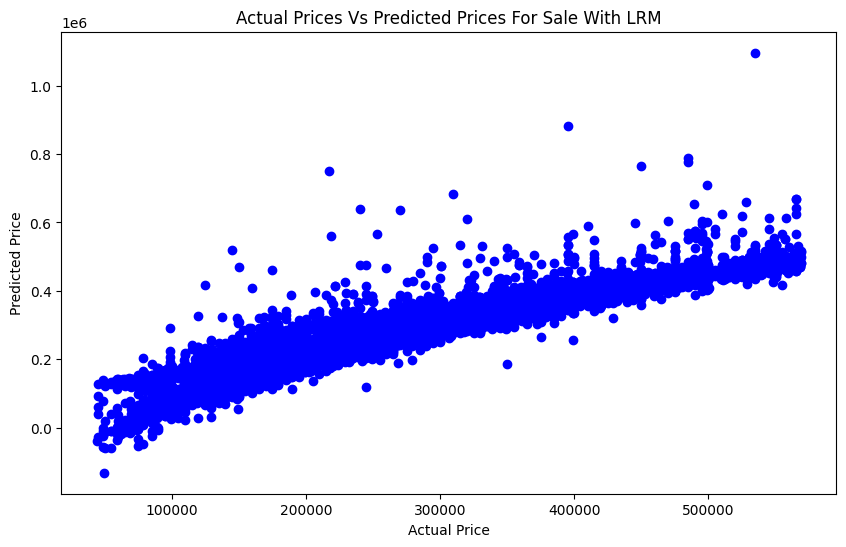

In [462]:
plt.scatter(Y_train, training_data_prediction_sale_lin, c='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices For Sale With LRM')
plt.show()

#### LASSO REGRESSION

In [463]:
lasso_reg_model = Lasso()

In [464]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [465]:
# prediction on tarining data 
training_data_prediction_sale_las = lasso_reg_model.predict(X_train)

# R2 ERROR 
error_score = metrics.r2_score(Y_train, training_data_prediction_sale_las)

print('R squared error: ', error_score)

R squared error:  0.875648742889432


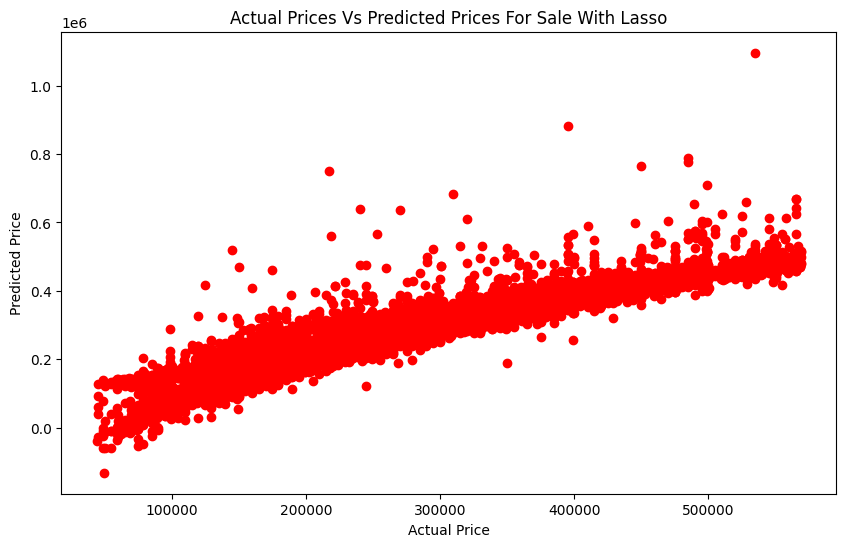

In [466]:
plt.scatter(Y_train, training_data_prediction_sale_las, c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices For Sale With Lasso')
plt.show()

## <p style="background-color:#696969; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Rent </p>

### <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Data PreProcessing</p>

#### Creating RENT

In [467]:
# Creating Rent
Rent = df[df['to_rent'] == True]

In [468]:
Rent.head(3)

,Unnamed: 0,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,area_of_the_terrace,garden,area_of_the_garden,swimming_pool,state_of_the_building,zipcode,type,region,region_be,price_perm2
0,0,True,485.0,1.0,40.0,True,False,False,False,0.0,False,0.0,False,excellentétat,4020,Studio,Liège,Region Walloonie,12.125000
1,1,True,790.0,2.0,140.0,True,False,False,False,0.0,False,0.0,False,bon,3200,Appartement,Flemish Region,Region Flanders,5.642857
2,2,True,520.0,2.0,50.0,True,False,False,False,0.0,False,0.0,False,bon,6900,Appartement,Luxembourg,Region Walloonie,10.400000


In [469]:
Rent.shape

(7888, 19)

In [470]:
Rent.reset_index()

,index,Unnamed: 0,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,area_of_the_terrace,garden,area_of_the_garden,swimming_pool,state_of_the_building,zipcode,type,region,region_be,price_perm2
0,0,0,True,485.0,1.0,40.000000,True,False,False,False,0.0,False,0.0,False,excellentétat,4020,Studio,Liège,Region Walloonie,12.125000
1,1,1,True,790.0,2.0,140.000000,True,False,False,False,0.0,False,0.0,False,bon,3200,Appartement,Flemish Region,Region Flanders,5.642857
2,2,2,True,520.0,2.0,50.000000,True,False,False,False,0.0,False,0.0,False,bon,6900,Appartement,Luxembourg,Region Walloonie,10.400000
3,3,3,True,640.0,1.0,160.505415,True,True,False,False,0.0,False,0.0,False,bon,3200,Appartement,Flemish Region,Region Flanders,3.987404
4,4,4,True,660.0,2.0,95.000000,True,False,False,False,0.0,False,0.0,False,excellentétat,4920,Appartement,Liège,Region Walloonie,6.947368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,7883,7885,True,880.0,1.0,68.000000,True,False,False,True,2.0,False,0.0,False,excellentétat,1040,Appartement,Brussels,Brussels,12.941176
7884,7884,7886,True,920.0,3.0,163.000000,True,False,False,True,21.0,False,0.0,False,excellentétat,4682,Duplex,Liège,Region Walloonie,5.644172
7885,7885,7887,True,800.0,2.0,86.000000,True,False,False,True,5.0,False,0.0,False,excellentétat,9400,Appartement,East Flanders,Region Flanders,9.302326
7886,7886,7888,True,930.0,3.0,155.000000,True,False,False,True,10.0,False,0.0,False,excellentétat,4500,Duplex,Liège,Region Walloonie,6.000000


In [471]:
Rent.drop(['Unnamed: 0'], axis=1, inplace=True)

In [472]:
Rent.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7888 entries, 0 to 7887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   to_rent                 7888 non-null   bool   
 1   price                   7888 non-null   float64
 2   number_of_rooms         7888 non-null   float64
 3   living_area             7888 non-null   float64
 4   fully_equipped_kitchen  7888 non-null   bool   
 5   furnished               7888 non-null   bool   
 6   open_fire               7888 non-null   bool   
 7   terrace                 7888 non-null   bool   
 8   area_of_the_terrace     7888 non-null   float64
 9   garden                  7888 non-null   bool   
 10  area_of_the_garden      7888 non-null   float64
 11  swimming_pool           7888 non-null   bool   
 12  state_of_the_building   7888 non-null   object 
 13  zipcode                 7888 non-null   int64  
 14  type                    7888 non-null   

#### Dropping Columns

In [473]:
Rent.drop(['open_fire', 'area_of_the_terrace','area_of_the_garden','zipcode','region_be','to_rent'],axis=1, inplace=True)

In [474]:
Rent.sample(7)

,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,terrace,garden,swimming_pool,state_of_the_building,type,region,price_perm2
7536,925.0,3.0,114.000000,True,False,True,True,False,bon,Appartement,East Flanders,8.114035
5547,695.0,2.0,93.000000,True,False,False,True,False,bon,Appartement,Walloon Region,7.473118
6910,1400.0,4.0,160.505415,True,True,True,True,False,excellentétat,Maison,Liège,8.722447
7457,795.0,2.0,119.000000,True,False,False,True,False,bon,Maison,Walloon Region,6.680672
7638,750.0,2.0,160.505415,True,False,True,False,False,excellentétat,Appartement,Walloon Region,4.672740
5351,700.0,2.0,160.505415,True,False,True,False,False,fraîchementrénové,Appartement,Walloon Brabant,4.361224
6255,1500.0,2.0,100.000000,True,False,True,False,False,excellentétat,Appartement,Brussels,15.000000


#### Outliers Of The Sale

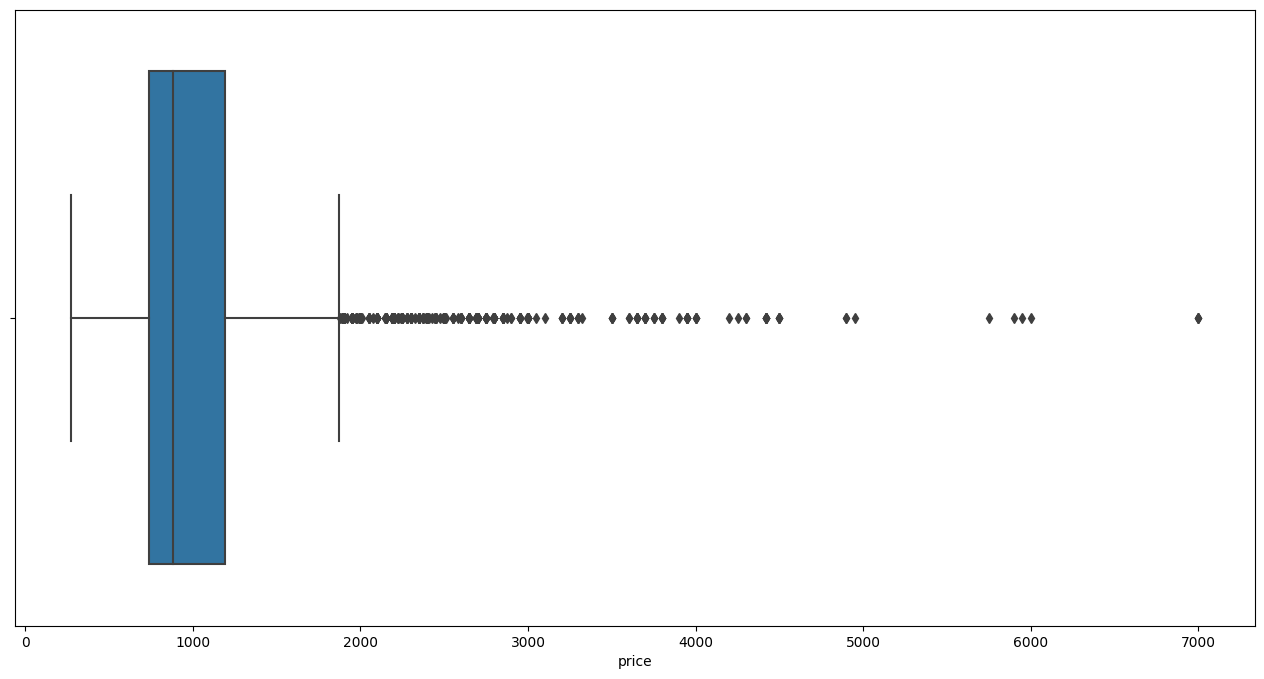

In [475]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="price", data=Rent) 
plt.show()

In [476]:
Rent.shape

(7888, 12)

In [477]:
Outlier_upper_Rent = Rent[Rent.price >= 1700].index
Rent.drop(Outlier_upper_Rent, inplace = True)

In [478]:
Rent.shape

(7156, 12)

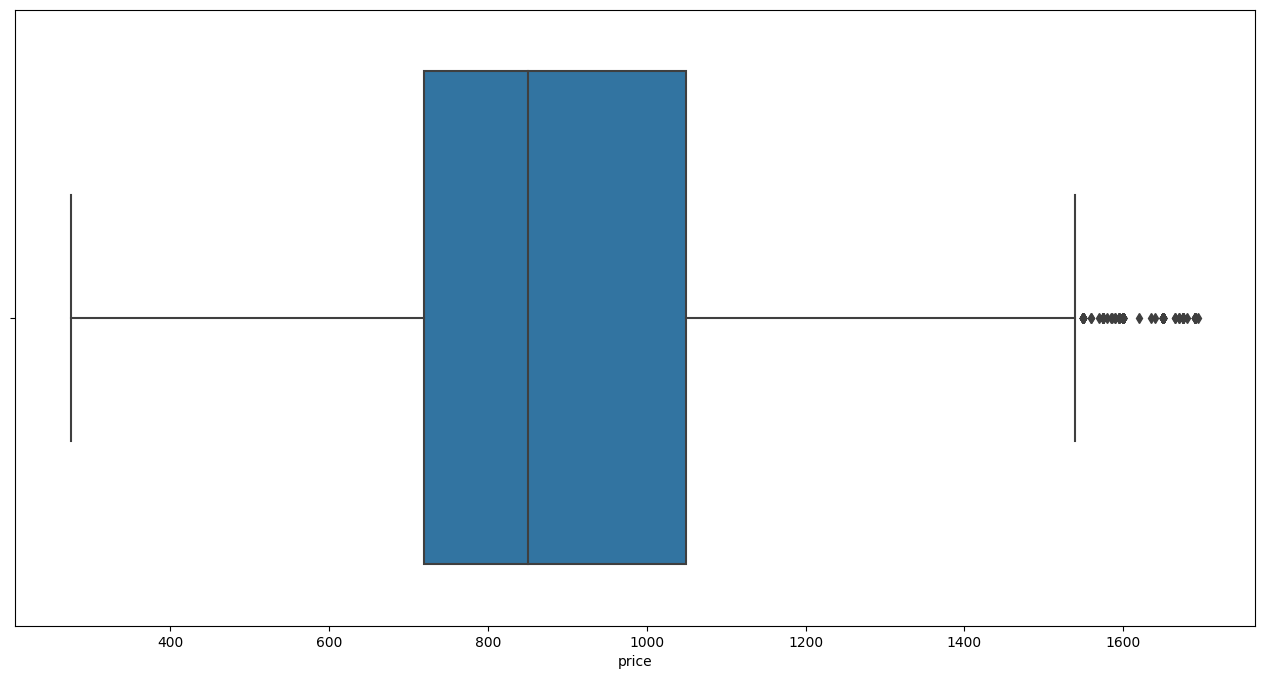

In [479]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="price", data=Rent) 
plt.show()

<AxesSubplot: >

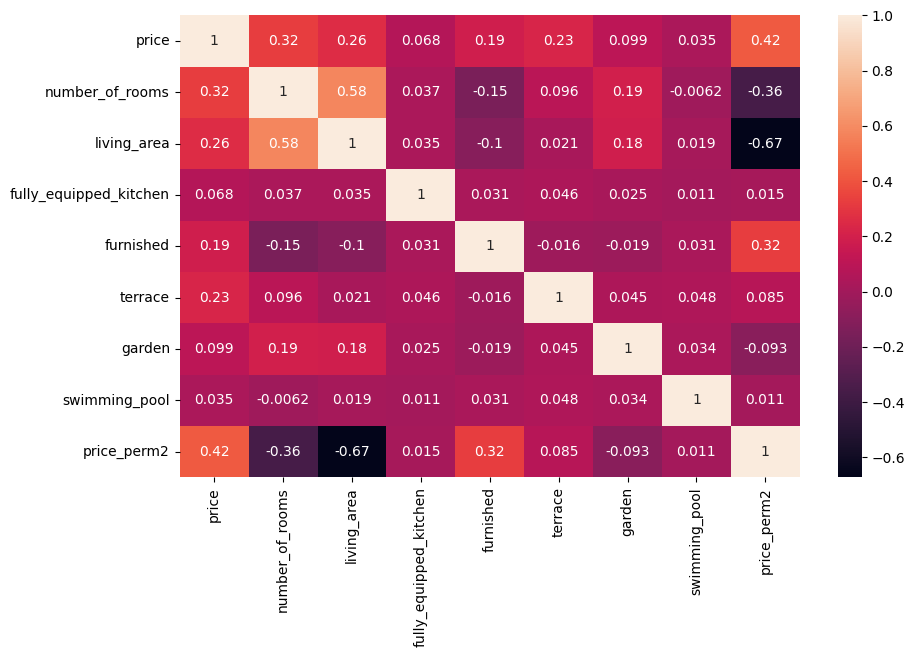

In [480]:
sns.heatmap(Rent.corr(), annot= True)

#### Dummies

In [481]:
Rent

,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,terrace,garden,swimming_pool,state_of_the_building,type,region,price_perm2
0,485.0,1.0,40.000000,True,False,False,False,False,excellentétat,Studio,Liège,12.125000
1,790.0,2.0,140.000000,True,False,False,False,False,bon,Appartement,Flemish Region,5.642857
2,520.0,2.0,50.000000,True,False,False,False,False,bon,Appartement,Luxembourg,10.400000
3,640.0,1.0,160.505415,True,True,False,False,False,bon,Appartement,Flemish Region,3.987404
4,660.0,2.0,95.000000,True,False,False,False,False,excellentétat,Appartement,Liège,6.947368
...,...,...,...,...,...,...,...,...,...,...,...,...
7883,880.0,1.0,68.000000,True,False,True,False,False,excellentétat,Appartement,Brussels,12.941176
7884,920.0,3.0,163.000000,True,False,True,False,False,excellentétat,Duplex,Liège,5.644172
7885,800.0,2.0,86.000000,True,False,True,False,False,excellentétat,Appartement,East Flanders,9.302326
7886,930.0,3.0,155.000000,True,False,True,False,False,excellentétat,Duplex,Liège,6.000000


In [482]:
# assign the columns which will be changed 
columns_to_change = ["furnished", "terrace", "garden","fully_equipped_kitchen","swimming_pool"]

# looking all the rows in the columns and change it 
for column in columns_to_change:
    Rent[column] = Rent[column].replace({True: 1, False: 0})

In [483]:
dummies2 = pd.get_dummies(Rent)

In [484]:
dummies2.head()

,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,terrace,garden,swimming_pool,price_perm2,state_of_the_building_bon,...,region_East Flanders,region_Flemish Brabant,region_Flemish Region,region_Hainaut,region_Limburg,region_Liège,region_Luxembourg,region_Namur,region_Walloon Brabant,region_Walloon Region
0,485.0,1.0,40.000000,1,0,0,0,0,12.125000,0,...,0,0,0,0,0,1,0,0,0,0
1,790.0,2.0,140.000000,1,0,0,0,0,5.642857,1,...,0,0,1,0,0,0,0,0,0,0
2,520.0,2.0,50.000000,1,0,0,0,0,10.400000,1,...,0,0,0,0,0,0,1,0,0,0
3,640.0,1.0,160.505415,1,1,0,0,0,3.987404,1,...,0,0,1,0,0,0,0,0,0,0
4,660.0,2.0,95.000000,1,0,0,0,0,6.947368,0,...,0,0,0,0,0,1,0,0,0,0


In [485]:
dummies2.shape

(7156, 46)

#### Assign X-y 

In [486]:
X = dummies2.drop('price', axis=1)
y = dummies2['price']

In [487]:
X

,number_of_rooms,living_area,fully_equipped_kitchen,furnished,terrace,garden,swimming_pool,price_perm2,state_of_the_building_bon,state_of_the_building_excellentétat,...,region_East Flanders,region_Flemish Brabant,region_Flemish Region,region_Hainaut,region_Limburg,region_Liège,region_Luxembourg,region_Namur,region_Walloon Brabant,region_Walloon Region
0,1.0,40.000000,1,0,0,0,0,12.125000,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2.0,140.000000,1,0,0,0,0,5.642857,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,50.000000,1,0,0,0,0,10.400000,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,160.505415,1,1,0,0,0,3.987404,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,95.000000,1,0,0,0,0,6.947368,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,1.0,68.000000,1,0,1,0,0,12.941176,0,1,...,0,0,0,0,0,0,0,0,0,0
7884,3.0,163.000000,1,0,1,0,0,5.644172,0,1,...,0,0,0,0,0,1,0,0,0,0
7885,2.0,86.000000,1,0,1,0,0,9.302326,0,1,...,1,0,0,0,0,0,0,0,0,0
7886,3.0,155.000000,1,0,1,0,0,6.000000,0,1,...,0,0,0,0,0,1,0,0,0,0


In [488]:
y

0        485.0
1        790.0
2        520.0
3        640.0
4        660.0
         ...  
7883     880.0
7884     920.0
7885     800.0
7886     930.0
7887    1590.0
Name: price, Length: 7156, dtype: float64

### <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Train & Test </p>

In [489]:
# assingning our train and test variables and selecting our test ratio 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=35)

In [490]:
# loading the linear regression model
lin_reg_model_R = LinearRegression()

#Fitting it into our model 
lin_reg_model_R.fit(X_train, Y_train)

LinearRegression()

### <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Ml Models For Rent </p>

LINEAR REGRESSION

In [491]:
# prediction on tarining data 
training_data_prediction_R = lin_reg_model_R.predict(X_train)

# R2 ERROR 
error_score = metrics.r2_score(Y_train, training_data_prediction_R)

print('R squared error With LRM: ', error_score)

R squared error With LRM:  0.8132652440566956


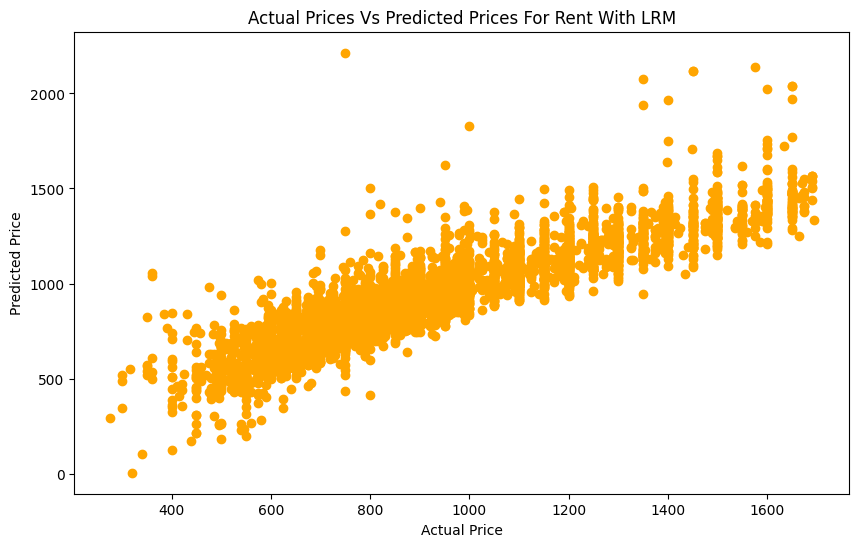

In [492]:
plt.scatter(Y_train, training_data_prediction_R, c='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices For Rent With LRM')
plt.show()

LASSO REGRESSION

In [493]:
lasso_reg_model2 = Lasso()

In [494]:
lasso_reg_model2.fit(X_train, Y_train)

Lasso()

In [495]:
# prediction on tarining data 
training_data_prediction_L = lasso_reg_model2.predict(X_train)

# R2 ERROR 
error_score = metrics.r2_score(Y_train, training_data_prediction_L)

print('R squared error for LASRM: ', error_score)

R squared error for LASRM:  0.8046670348406348


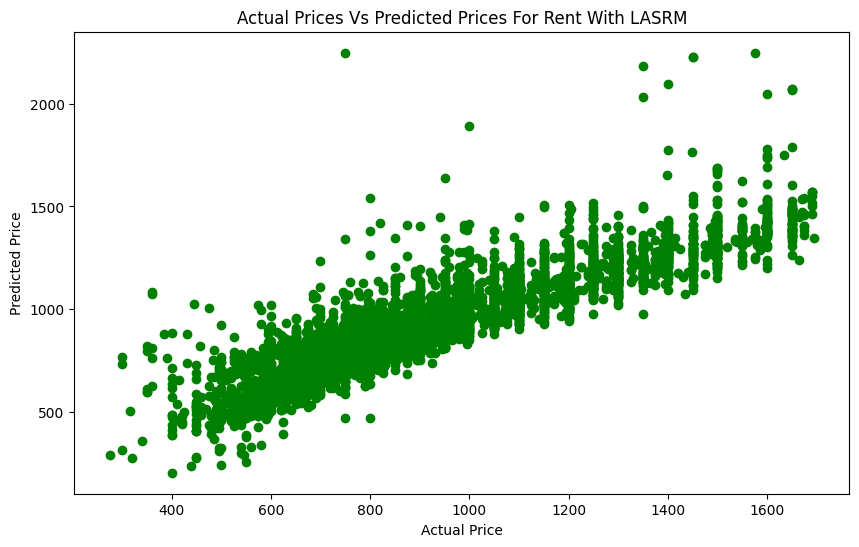

In [496]:
plt.scatter(Y_train, training_data_prediction_L, c='Green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices For Rent With LASRM')
plt.show()

## <p style="background-color:#000080; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Conclusion </p>


<p>In this project, we proposed a machine-learning model for Price Prediction on Real Estate Listings. We preprocessed the data and evaluated multiple algorithms including <b>Linear Regression Method</b> and <b>the Lasso Regression method</b>. Our results showed that Linear Regression Method achieved the highest R-squared error rate with a score of <b>0.875</b> </p>

<p>In conclusion, the proposed model has the potential for Linear Regression Method. The model could predict the prices of Estates easily. The prediction is based on The Estates Features. The Features are; </p>

<ul>
  <li>Number of rooms</li>
  <li>Living Area (m2)</li>
  <li>If the Kitchen Fully Equipped</li>
  <li>If Estate Furnished</li>
  <li>If Estate has a Garden</li>
  <li>If Estate has a Swimming Pool </li>
  <li>What are the conditions of the statement (6 options)</li>
  <li>Type of the house (17 different types)</li>
  <li>Their Region (9 different provinces from Belgium)</li>
</ul>


Below you can see your graphs of 2 models of our data comparing Actual Price and Forecast Price.

- For Sale

<img src="https://i.hizliresim.com/l5aeuaw.png" alt="ML MODEL For Sale">


- For Rent

<img src="https://i.hizliresim.com/ovowmeu.png" alt="ML MODEL For Sale">
